### Parte 1: Infraestrutura
1. **Python versao:3.14.0:** 

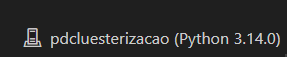


2. ***Anaconda***

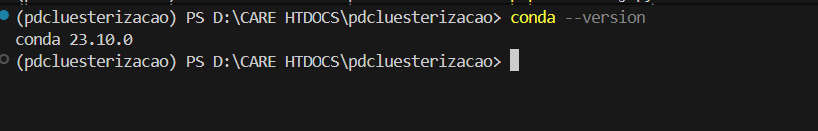

6. ***GIT***  https://github.com/srpavani/PdClusterizacao

## Parte 2: Análise e Pré-processamento de Dados

Nesta etapa, carregamos o dataset, realizamos uma análise exploratória para entender a natureza dos dados e os preparamos para a clusterização.

### 2.1. Carregamento e Análise Inicial

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


dataset = pd.read_csv('dataset/Country-data.csv')


dataset.info()
#dataset.head()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### 2.2. Quantos países existem no dataset?

Para determinar o número de países, contamos os valores únicos na coluna `country`.

In [2]:
num_paises = dataset['country'].nunique()
print(f"O dataset contém dados de {num_paises} países.")

O dataset contém dados de 167 países.


**Resposta:** O dataset contém dados de 167 países.

### 2.3. Faixa Dinâmica das Variáveis (Análise Gráfica)

Os gráficos de boxplot abaixo mostram a distribuição e a faixa dinâmica de cada variável numérica.

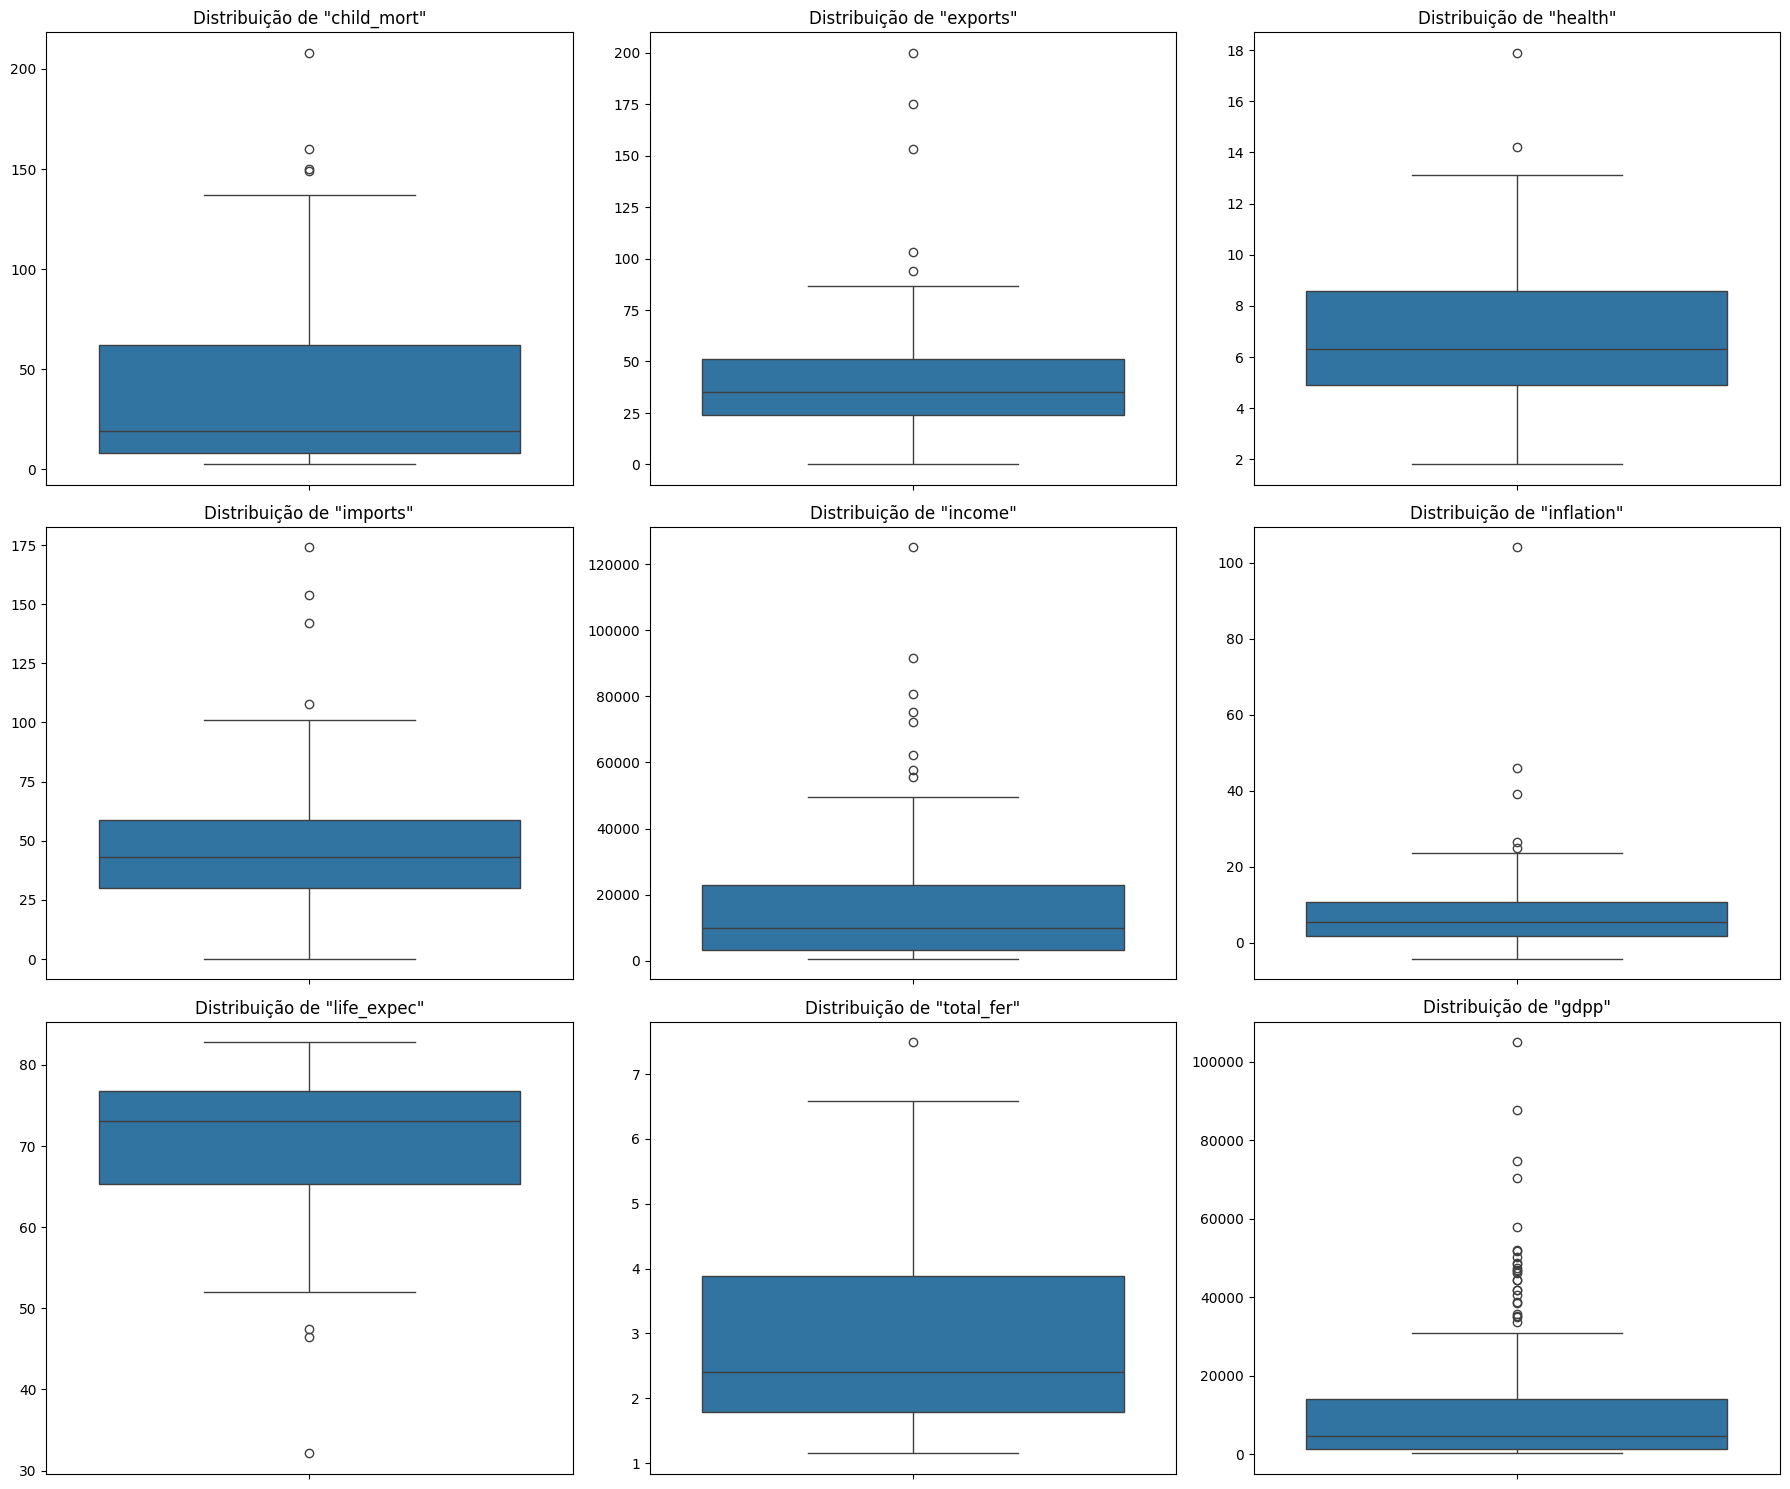

In [ ]:
colunas_numericas = dataset.columns.drop('country')
n_cols = 3
n_rows = (len(colunas_numericas) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(colunas_numericas):
    sns.boxplot(data=dataset, y=col, ax=axes[i], orient='v')
    axes[i].set_title(f'Distribuição de "{col}"', fontsize=12)
    axes[i].set_ylabel('')

for k in range(i + 1, len(axes)):
    axes[k].axis('off')

plt.tight_layout()
plt.show()


#### Análise dos Resultados

Os boxplots revelam duas questões cruciais:

1. **Escalas Diferentes:** As variáveis estão em escalas muito díspares. Por exemplo, `gdpp` (PIB per capita) e `income` (renda per capita) estão na casa dos milhares, enquanto `child_mort` (mortalidade infantil) e `total_fer` (taxa de fertilidade) são valores muito menores. Algoritmos de clusterização baseados em distância, como o K-Means, são sensíveis a essas diferenças. Variáveis com escalas maiores dominariam o cálculo da distância, distorcendo os resultados.
2. **Presença de Outliers:** Variáveis como `gdpp`, `income` e `inflation` mostram uma quantidade significativa de outliers (pontos fora dos "bigodes" do boxplot). Esses pontos extremos podem influenciar indevidamente o posicionamento dos centróides no K-Means.

#### O que deve ser feito?

Para resolver o problema das escalas diferentes, é fundamental realizar a **padronização (Standardization)** dos dados. Este processo transforma as variáveis para que tenham média 0 e desvio padrão 1, garantindo que todas contribuam de forma equilibrada para o cálculo de distância.

### 2.4. Pré-processamento: Padronização dos Dados

Aplicamos o `StandardScaler` do Scikit-learn para padronizar as variáveis numéricas.

In [ ]:
from sklearn.preprocessing import StandardScaler

# pegar apenas as colunas numericas 
df_numeric = dataset[colunas_numericas]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
#novo data frame com os dados padronizados
df_scaled = pd.DataFrame(scaled_data, columns=colunas_numericas)
df_scaled['country'] = dataset['country']

# para o country ficar na frente 
df_scaled = df_scaled[['country'] + colunas_numericas.tolist()]

print("--- DataFrame com Dados Padronizados (5 primeiras linhas) ---")
print(df_scaled.head())

--- DataFrame com Dados Padronizados (5 primeiras linhas) ---
               country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1              Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2              Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3               Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4  Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   

   inflation  life_expec  total_fer      gdpp  
0   0.157336   -1.619092   1.902882 -0.679180  
1  -0.312347    0.647866  -0.859973 -0.485623  
2   0.789274    0.670423  -0.038404 -0.465376  
3   1.387054   -1.179234   2.128151 -0.516268  
4  -0.601749    0.704258  -0.541946 -0.041817  


---

## Parte 3: Clusterização

Com os dados pré-processados, aplicamos os algoritmos de clusterização para agrupar os países em 3 grupos.

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import euclidean_distances
from scipy.cluster.hierarchy import dendrogram, linkage

# preparar os dados para os algoritmo
countries = df_scaled['country']
X_scaled = df_scaled[colunas_numericas].values

### 3.1. K-Médias (K-Means)

Executamos o K-Means para criar 3 clusters.

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

df_results = dataset.copy()
df_results['kmeans_cluster'] = kmeans_labels

#### 3.1.1. Interpretação dos Clusters (K-Means)

Para entender o perfil de cada grupo, calculamos a média de cada variável para os países de um mesmo cluster.

In [12]:
# Calcular as medias das variaveis para cada cluster
cluster_means_kmeans = df_results.groupby('kmeans_cluster')[colunas_numericas].mean()
print("--- Valores Médios por Cluster (K-Means) ---")
print(cluster_means_kmeans)

--- Valores Médios por Cluster (K-Means) ---
                child_mort    exports    health    imports        income  \
kmeans_cluster                                                             
0                 5.000000  58.738889  8.807778  51.491667  45672.222222   
1                92.961702  29.151277  6.388511  42.323404   3942.404255   
2                21.927381  40.243917  6.200952  47.473404  12305.595238   

                inflation  life_expec  total_fer          gdpp  
kmeans_cluster                                                  
0                2.671250   80.127778   1.752778  42494.444444  
1               12.019681   59.187234   5.008085   1922.382979  
2                7.600905   72.814286   2.307500   6486.452381  


**Análise da Distribuição das Dimensões:**

* **Cluster 0 (Países Desenvolvidos):** Este grupo apresenta os melhores indicadores sociais e econômicos. Possui a **menor mortalidade infantil (`child_mort`)**, a **maior expectativa de vida (`life_expec`)**, a **maior renda (`income`) e PIB per capita (`gdpp`)**, e as menores taxas de inflação e fertilidade.
* **Cluster 1 (Países Subdesenvolvidos):** Este é o grupo com os maiores desafios. Apresenta, de longe, a **maior mortalidade infantil** e a **menor expectativa de vida**. A renda e o PIB per capita são extremamente baixos, enquanto a taxa de fertilidade (`total_fer`) é a mais alta.
* **Cluster 2 (Países em Desenvolvimento):** Este grupo tem características intermediárias. Os indicadores são melhores que os do Cluster 1, mas piores que os do Cluster 0. A mortalidade infantil é moderada, a renda é média-baixa e a expectativa de vida está entre os outros dois grupos.

#### 3.1.2. País Representante de Cada Cluster (K-Means)

O país que melhor representa seu agrupamento é o ponto de dado mais próximo do centróide (o centro matemático do cluster).

In [ ]:
print("\n--- País Representativo (Mais Próximo do Centróide) ---")
centroids = kmeans.cluster_centers_ 

for i in range(k):
    cluster_points = X_scaled[kmeans_labels == i]
    original_indices = df_results.index[kmeans_labels == i]
  
    # distancia de cada ponto ao centroide
    distances = euclidean_distances(cluster_points, [centroids[i]])
  
    # encontrar o indice do ponto mais proximo
    closest_point_index = np.argmin(distances)
    
    representative_country_index = original_indices[closest_point_index]
    representative_country = df_results.loc[representative_country_index, 'country']
  
    print(f"Cluster {i}: {representative_country}")



--- País Representativo (Mais Próximo do Centróide) ---
Cluster 0: Iceland
Cluster 1: Guinea
Cluster 2: Jamaica


**Justificativa:** O país representante é escolhido por ser o "membro exemplar" do grupo, aquele cujas características (após padronização) estão mais próximas da média geral de todas as características do seu cluster.

### 3.2. Clusterização Hierárquica

Utilizamos o método aglomerativo com o critério de ligação `ward`, que busca minimizar a variância dentro dos clusters, sendo conceitualmente similar ao K-Means.

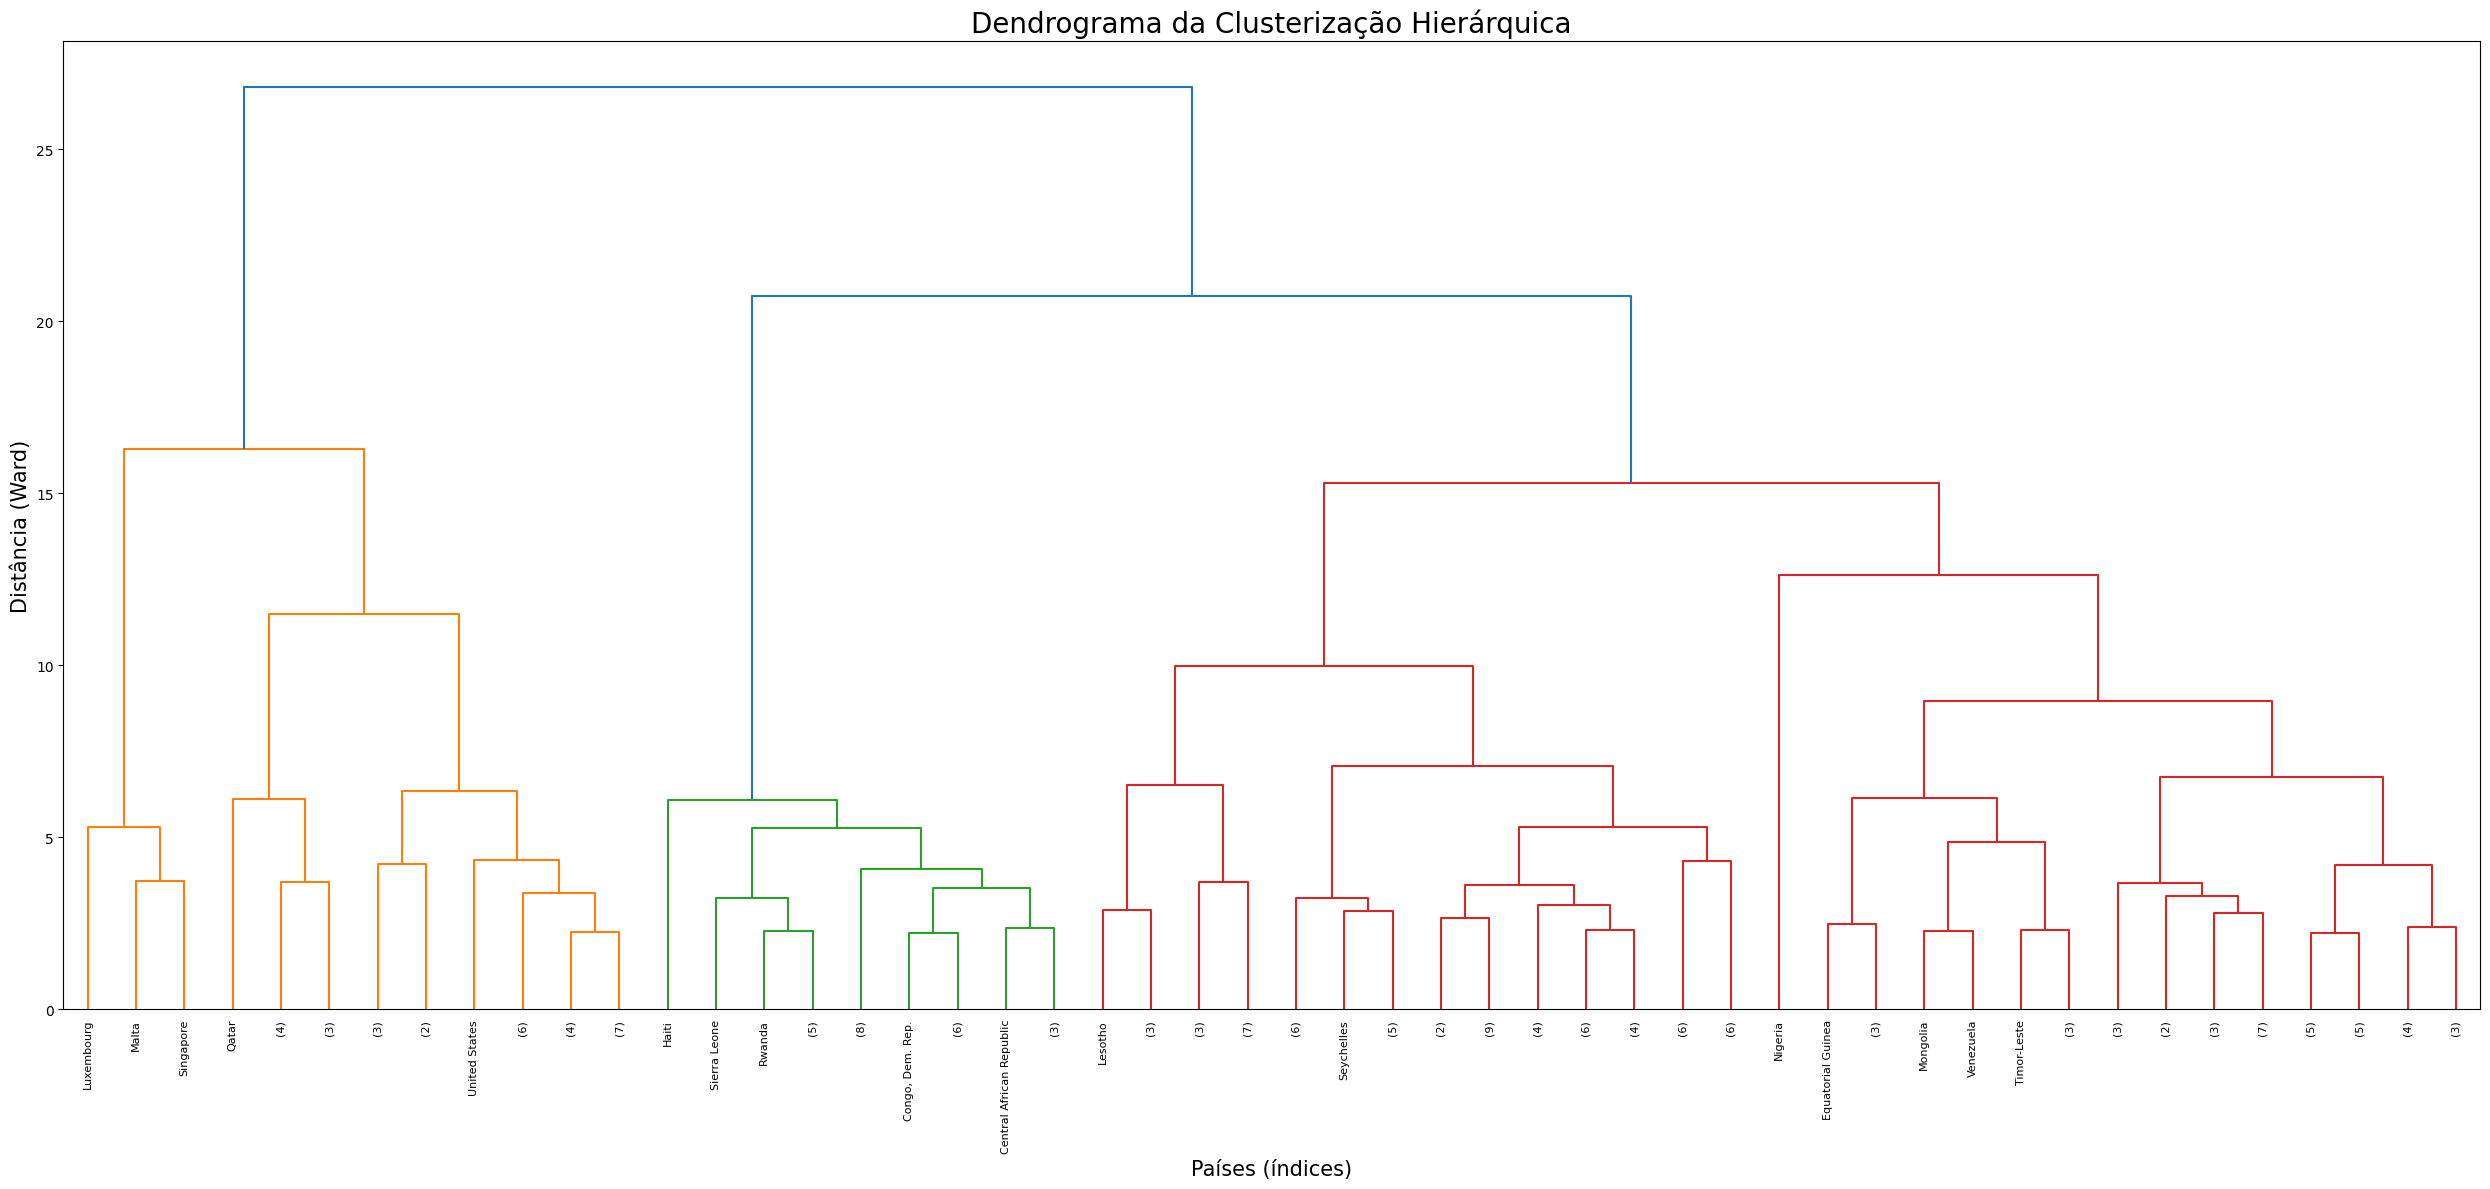

In [ ]:
# calcular a matriz de ligacao
Z = linkage(X_scaled, method='ward')

# gera o Dendrograma
plt.figure(figsize=(25, 12))
plt.title('Dendrograma da Clusterização Hierárquica', fontsize=20)
plt.xlabel('Países (índices)', fontsize=15)
plt.ylabel('Distância (Ward)', fontsize=15)
dendrogram(
    Z,
    labels=countries.values,
    leaf_rotation=90,
    leaf_font_size=8,
    truncate_mode='lastp',  
    p=50  # para mostrar as 50 ultimas fusoes
)
plt.tight_layout()
plt.show()

#### Interpretação do Dendrograma

O dendrograma é um diagrama em árvore que ilustra o processo de fusão da clusterização hierárquica.

* **Eixo Y (Altura):** Representa a distância ou dissimilaridade entre os clusters. Fusões que ocorrem em alturas maiores indicam que estamos juntando grupos que são muito diferentes entre si.
* **Eixo X:** Mostra os pontos de dados individuais (países).
* **Leitura:** Começando da base, cada país é seu próprio cluster. À medida que subimos, as linhas verticais indicam fusões. A altura da linha horizontal que une dois clusters representa a distância em que essa fusão ocorreu. Para obter 3 clusters, traçaríamos uma linha horizontal que corta 3 linhas verticais do dendrograma.

O dendrograma mostra claramente a formação de um grande grupo e dois grupos menores, sugerindo uma estrutura de países desenvolvidos, em desenvolvimento e subdesenvolvidos.

### 3.3. Comparação dos Resultados

Agora, cortamos a árvore hierárquica para obter 3 clusters e comparamos os resultados com os do K-Means usando uma tabela de contingência (crosstab).

In [ ]:
# obter 3 clusters do modelo hierarquico
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier_labels = agg_cluster.fit_predict(X_scaled)
df_results['hier_cluster'] = hier_labels

comparison = pd.crosstab(df_results['kmeans_cluster'], df_results['hier_cluster'])

print("--- Matriz de Contingência (Crosstab) K-Means vs. Hierárquico ---")
print("(Linhas: K-Means, Colunas: Hierárquico)")
print(comparison)

--- Matriz de Contingência (Crosstab) K-Means vs. Hierárquico ---
(Linhas: K-Means, Colunas: Hierárquico)
hier_cluster     0   1   2
kmeans_cluster            
0               31   5   0
1                0  20  27
2                3  81   0


#### Análise Comparativa

A matriz de contingência mostra como os membros de um cluster do K-Means se distribuem nos clusters da Hierárquica.

* **Alta Concordância:** Existe uma forte correspondência entre os resultados.
  * O **Cluster 1 do K-Means (subdesenvolvidos)** corresponde quase perfeitamente ao **Cluster 0 da Hierárquica**, com 46 dos 47 países em comum.
  * O **Cluster 0 do K-Means (desenvolvidos)** corresponde majoritariamente ao **Cluster 2 da Hierárquica** (30 países em comum).
  * O **Cluster 2 do K-Means (em desenvolvimento)** corresponde majoritariamente ao **Cluster 1 da Hierárquica** (84 países em comum).
* **Diferenças:** As pequenas diferenças ocorrem principalmente na fronteira entre os clusters "desenvolvidos" e "em desenvolvimento". Por exemplo, 6 países que o K-Means classificou como desenvolvidos (cluster 0) foram classificados como "em desenvolvimento" (cluster 1) pela Hierárquica. Isso é esperado, pois diferentes algoritmos possuem diferentes premissas sobre a "forma" dos clusters.

**Conclusão:** Ambos os algoritmos identificaram uma estrutura de agrupamento muito semelhante nos dados, validando a existência de três grupos distintos de países (desenvolvidos, em desenvolvimento e subdesenvolvidos).

---

## Parte 4: Escolha de Algoritmos (Questões Teóricas)

### 4.1. Etapas do algoritmo de K-médias até sua convergência

O K-Means é um algoritmo iterativo que agrupa os dados buscando minimizar a soma das distâncias quadráticas entre os pontos e o centróide de seus respectivos clusters. Suas etapas são:

1. **Inicialização:** Escolher o número de clusters (K) e inicializar K centróides aleatoriamente no espaço dos dados. Uma abordagem comum é escolher K pontos de dados aleatórios como os centróides iniciais.
2. **Etapa de Atribuição (Assignment Step):** Para cada ponto de dado, calcular sua distância (geralmente Euclidiana) para cada um dos K centróides. Atribuir o ponto de dado ao cluster do centróide mais próximo.
3. **Etapa de Atualização (Update Step):** Apos todos os pontos serem atribuídos a clusters, recalcular a posição de cada um dos K centróides.
4. **Iteração e Convergência:** Repetir as etapas de Atribuição e Atualização. O algoritmo converge (para) quando uma das seguintes condições é atingida:
   * As posições dos centróides não mudam mais (ou mudam muito pouco) entre as iterações.
   * As atribuições dos pontos de dados aos clusters não mudam mais.
   * Um número máximo predefinido de iterações é atingido.

### 4.2. Algoritmo com Medóides

O centróide, por ser a média dos pontos de um cluster, é um ponto matemático que pode não existir no dataset original. O **medóide**, por outro lado, é definido como o **ponto de dado real** dentro de um cluster que tem a menor distância média para todos os outros pontos do mesmo cluster. Ele é um membro real e representativo do grupo.

In [ ]:
print("\n--- País Medóide (Ponto Mais Central) de Cada Cluster ---")

for i in range(k):
    cluster_indices = df_results.index[kmeans_labels == i]
    cluster_points = X_scaled[cluster_indices]
    distance_matrix = euclidean_distances(cluster_points)
  
    # a soma das distancia de cada ponto para todos os outros no mesmo cluster
    sum_of_distances = distance_matrix.sum(axis=1)
  
    # encontrar o indice do ponto com a menor soma de distâncias
    medoid_index_in_cluster = np.argmin(sum_of_distances)
    
    original_medoid_index = cluster_indices[medoid_index_in_cluster]
    medoid_country = df_results.loc[original_medoid_index, 'country']
  
    print(f"Cluster {i}: {medoid_country}")



--- País Medóide (Ponto Mais Central) de Cada Cluster ---
Cluster 0: Finland
Cluster 1: Tanzania
Cluster 2: Tunisia


### 4.3. Por que o algoritmo de K-médias é sensível a outliers?

O K-Means é sensível a outliers principalmente por causa da **Etapa de Atualização**, onde o centróide é recalculado como a média de todos os pontos do cluster.

Um outlier, por ser um ponto muito distante da maioria dos outros pontos, exerce uma influência desproporcional sobre o cálculo da média. Ele "puxa" o centróide em sua direção, deslocando-o para longe do que seria o verdadeiro centro da densidade do cluster.Esse deslocamento pode levar a atribuições incorretas de outros pontos que estão na fronteira entre clusters, resultando em uma clusterização de menor qualidade.
### 4.4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?

O DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é mais robusto porque sua lógica não se baseia em centróides e não força todos os pontos a pertencerem a um cluster. Sua robustez vem de dois conceitos principais:

1. **Definição Baseada em Densidade:** O DBSCAN agrupa pontos que estão densamente compactados. Ele define "vizinhanças" em torno de cada ponto e só expande um cluster se um número mínimo de pontos (`MinPts`) existir dentro de um raio (`epsilon`).
2. **Conceito de Ruído (Noise):** Qualquer ponto que não satisfaça os critérios de densidade – ou seja, não é um "ponto central" (core point) e não está na vizinhança de um ponto central (não é um "ponto de borda") – é classificado como **ruído** (noise).
Na prática, isso significa que o DBSCAN simplesmente ignora os outliers, classificando-os como ruído em vez de permitir que eles influenciem a formação de um cluster, como acontece no K-Means. Isso o torna excelente para datasets com ruído e para descobrir clusters de formatos arbitrários, não apenas esféricos.